# Multivariate Analysis

Multivariate analysis is a more complex form of a statistical analysis technique and is used when there are more than two variables in the data set.

* Multiple dimensions = Multiple Columns = Multiple Features

* Relationships between many variables tell a story.

* In Machine Learning, multiple variables/columns are used to predict a outcome.
This outcome could be numerical(Regression Analysis) or Categorical(Classification) in Supervised Learning(where there may be a relationship between multiple variables with a outcome variable).

Multi-dimensional data analysis is an informative analysis of data which takes many relationships into account

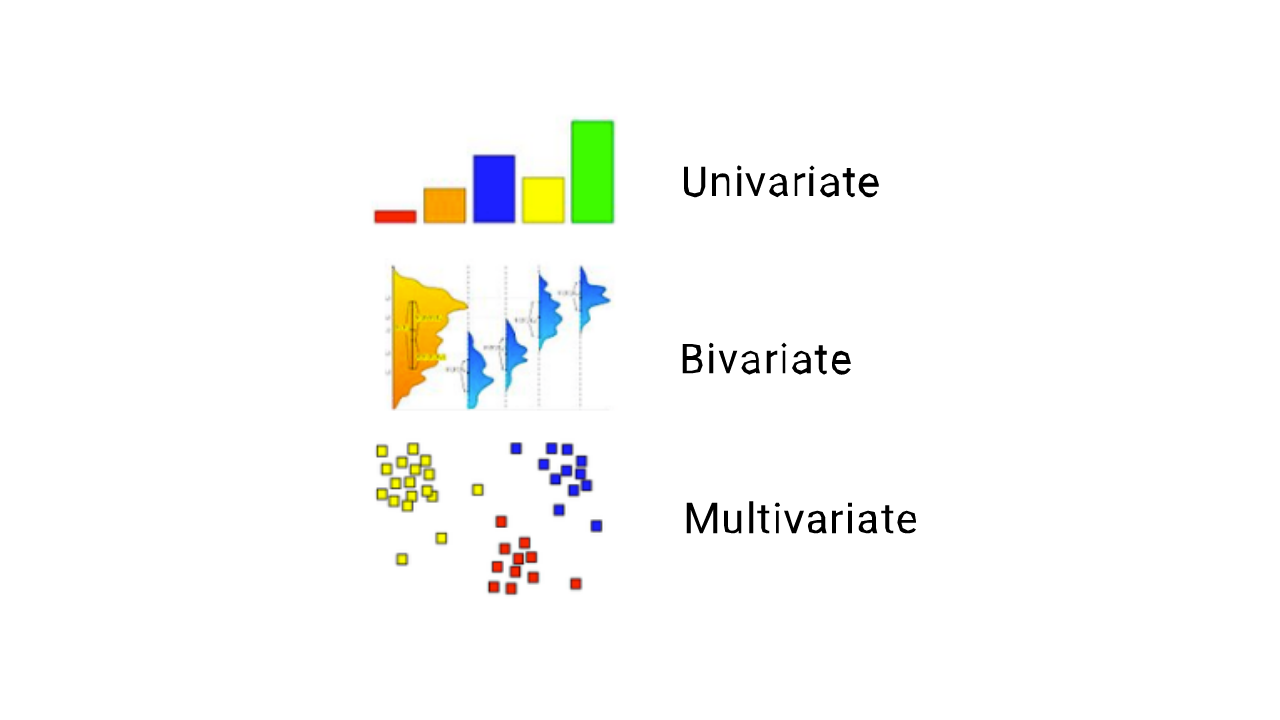

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use("ggplot")

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Problem at hand:

Business Question:
* Can we use the variables/columns given to us to predict whether some individual would be approved of a credit card? 
* Do we need a automated system for this here?

In [3]:

DATASET_PATH = "/content/clean_dataset.csv"
df = pd.read_csv(DATASET_PATH)

## Cleaning steps - numerical to categorical

## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

## Convert numerical variables to categorical variables
num_cat = ['Gender','Married','BankCustomer','PriorDefault','Employed','DriversLicense','Approved']

df[num_cat] = df[num_cat].astype('category')

## Categorical Variables
cat = ['Industry','Ethnicity','Citizen']

cat_df = df.select_dtypes('object')

df[cat] = cat_df.astype('category')

In [4]:
df.drop('ZipCode',axis=1,inplace=True)

In [5]:
df.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
count,690.0,690.000000,690.000000,690.0,690.0,690,690,690.000000,690.0,690.0,690.00000,690.0,690,690.000000,690.0
unique,2.0,NaN,NaN,2.0,2.0,14,5,NaN,2.0,2.0,NaN,2.0,3,NaN,2.0
top,1.0,NaN,NaN,1.0,1.0,Energy,White,NaN,1.0,0.0,NaN,0.0,ByBirth,NaN,0.0
freq,480.0,NaN,NaN,525.0,527.0,146,408,NaN,361.0,395.0,NaN,374.0,625,NaN,383.0
mean,NaN,31.514116,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,1017.385507,NaN
std,NaN,11.860245,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,395.500000,NaN


## Quantative Analysis - Given numerical variables find correlations within the variables and with the outcome variable at hand
* Use of Heatmaps - Looking at Correlations
* Use of pairplots or scatter matrices.

In [6]:
## Let's create one variable where credit card is approved and one for not approved.

# Outcome Variable
df['Credit_Card_Approved'] = np.where(df['Approved']==1,1,0)
df['Credit_Card_Not_Approved'] = np.where(df['Approved']==0,1,0)

##### Linear vs Non-Linear Relationships

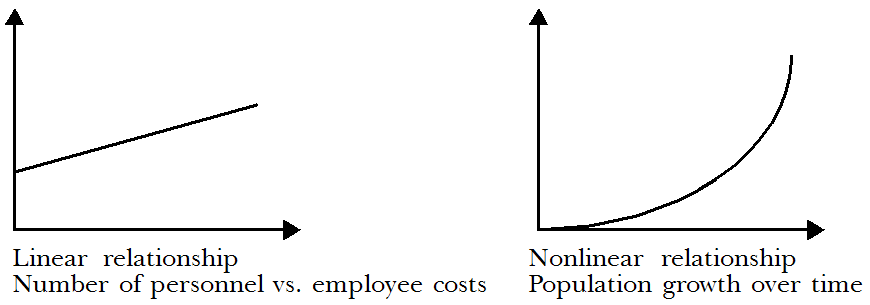

### Heatmap Correlation Analysis.
* Shows linear or non-linear correlations between variables/columns.
* Colorbars shows degree/strength of relationship within a distributed grid.

Text(0.5, 1.0, 'Linear Relationships within Variables')

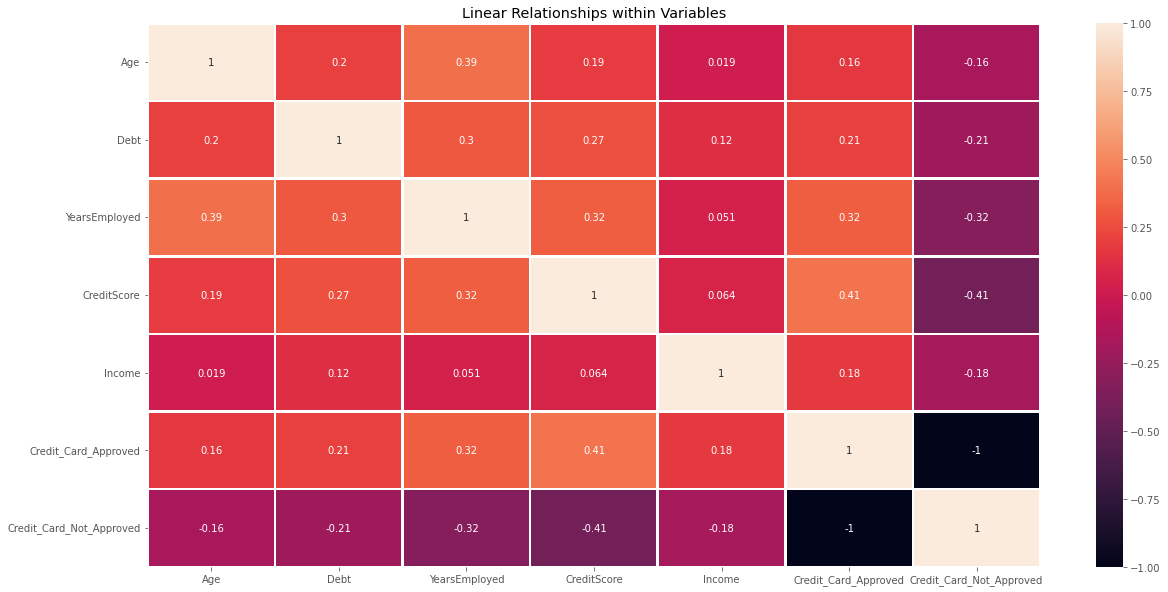

In [37]:
outcome_variables = ['Credit_Card_Approved','Credit_Card_Not_Approved']

## Numerical Variables
numerical = ['Age','Debt','YearsEmployed','CreditScore','Income']

variables = numerical+outcome_variables
#Linear assumption
lin_correlations = df[variables].corr(method='pearson')

sns.heatmap(lin_correlations,annot=True,fmt='1.2g',linewidth=1.5)
plt.title('Linear Relationships within Variables')

### Insights:
* Credit Card Approval is slightly linearly positively correlated with Credit Score and Years of Employment of an individual.
* Income seems to be least correlated with Credit Card Approval.

Text(0.5, 1.0, 'Non-Linear Relationships within Variables')

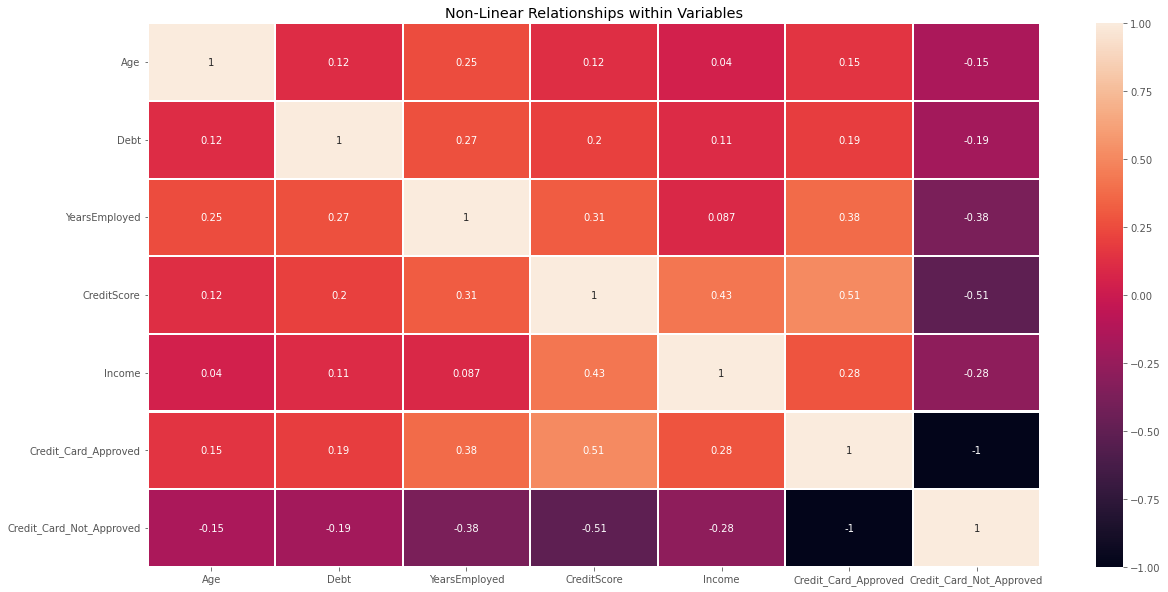

In [8]:
#Non-Linear assumption
non_lin_correlations = df[variables].corr(method='spearman')

sns.heatmap(non_lin_correlations,annot=True,fmt='1.2g',linewidth=1.2)
plt.title('Non-Linear Relationships within Variables')

### Insights:
* Non-linear correlations tell us a stronger story of how Credit Score and Years of Employment are positively correlated with Credit Card Approval

## Pairplot Analysis

* Look at scatter plots between each variable - Bivariate within.
* Look at distributions of each variable too.

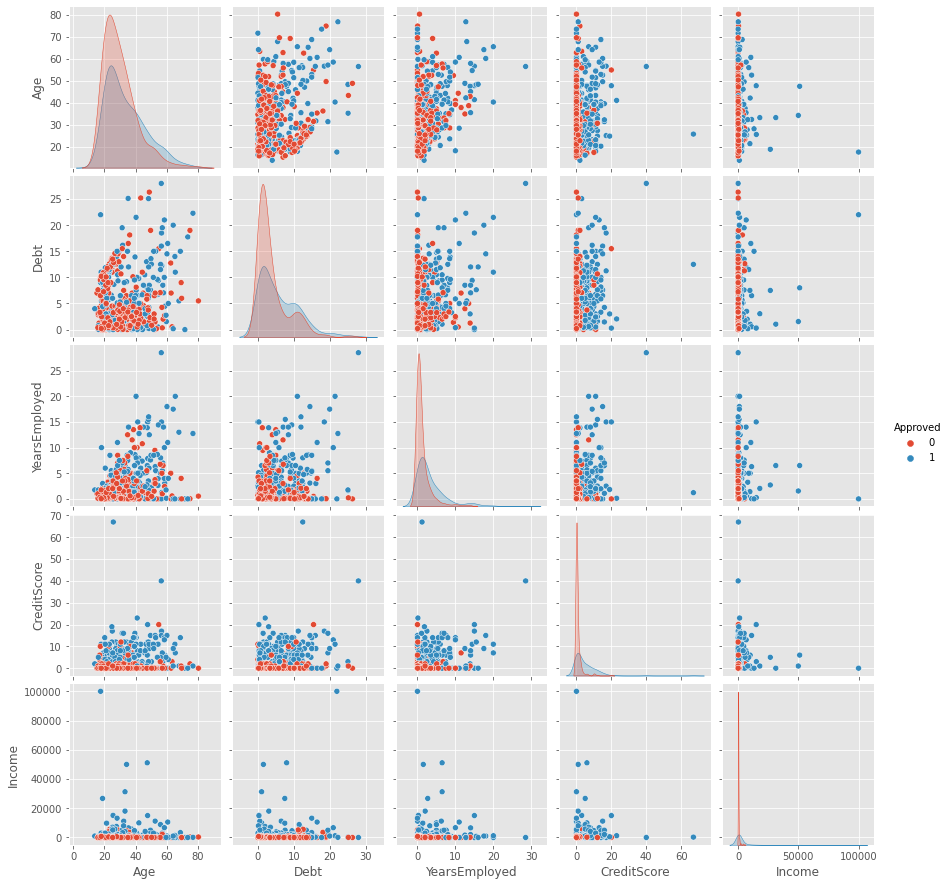

In [9]:
pairplot_variables = numerical+['Approved']

sns.pairplot(df[pairplot_variables],hue='Approved')

Note: Tells us a better story as to maybe how the individuals are distributed and how the relationship looks like, besides just correlations.

## Quantative and Qualitative Analysis - Given all categorical and numerical variables, look at the relationships within the data here.
* Grouped Boxplots/Swarmplots.
* Parallel Plots


## Grouped Boxplots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

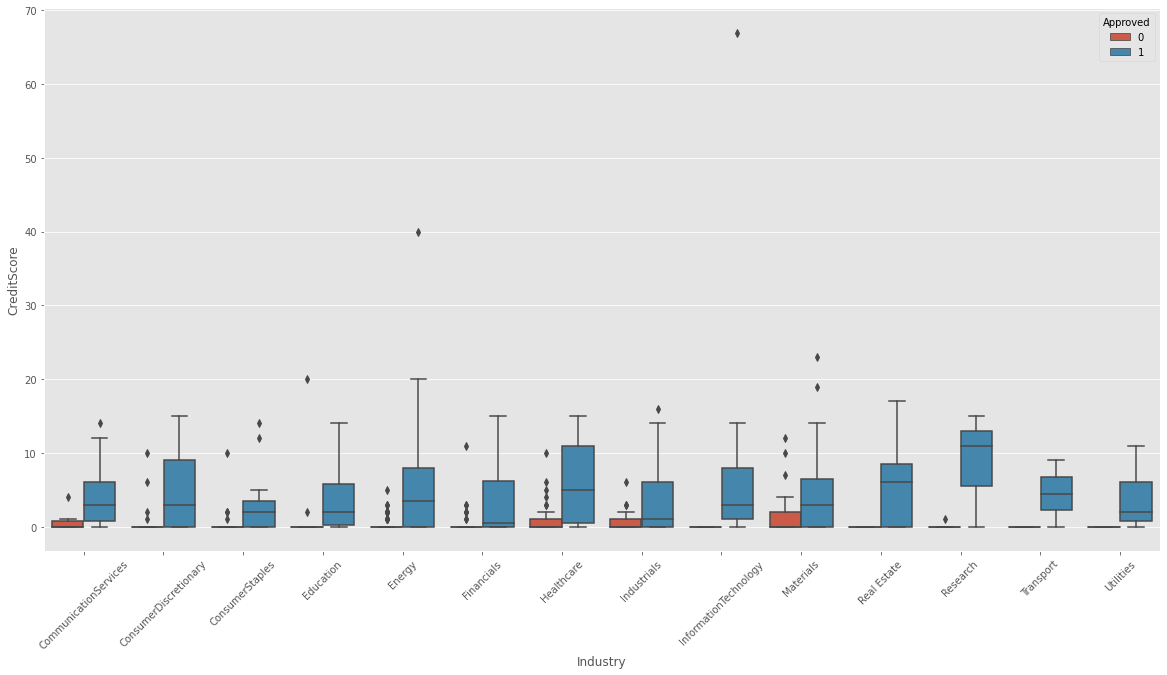

In [10]:
plt.figure(figsize = (20,10))
sns.boxplot(x='Industry',y='CreditScore',hue='Approved',data=df)
plt.xticks(rotation='45')

Now we see approval vs not approved,for various Industries that too based on credit score.  We see most of them have a good enought credit score. Look at the medians here. Energy, IT have many of them. Research too

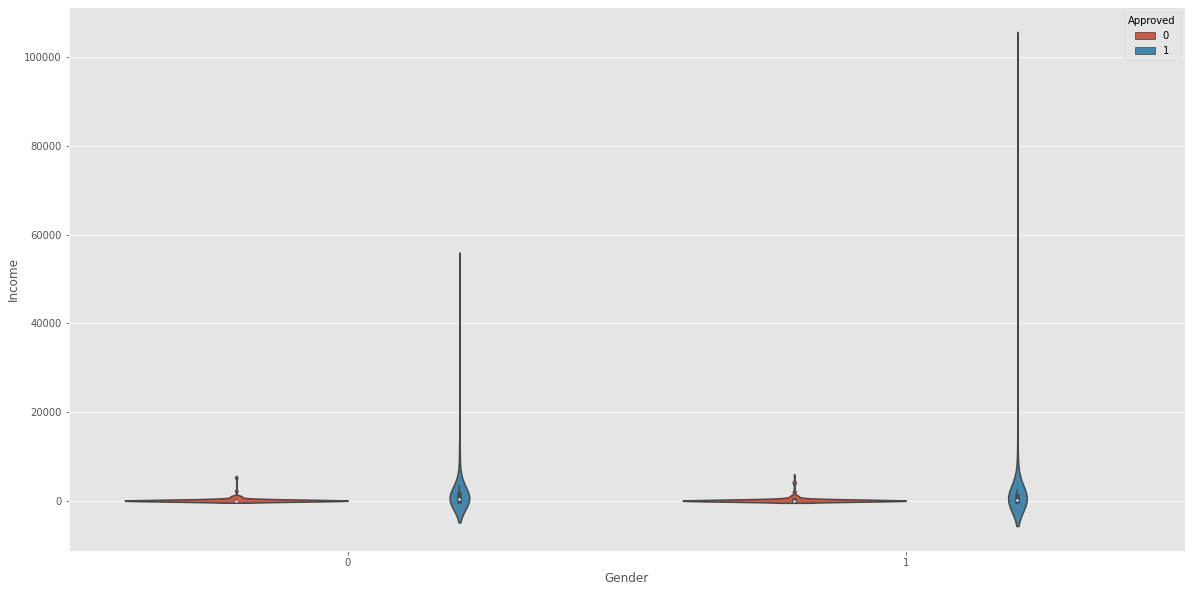

In [39]:
sns.violinplot(x='Gender',y='Income',hue='Approved',data=df)
#plt.ylim(-1000,60000)

Definitely seeing that many females with prior default, also have a higher income. While that is the opposite for males, you see the spread of income for prior default males is more than non defaulted males.

## Parallel Coordinate plot

Each variable is on a scale from minimum to maximum and we see lines connecting each scale, so if you click on one line you can see the variable values for each on each scale. That's the beauty of parallel coordinate plots. We recommend to slice and dice big datasets to avoid clutter before applying the plot on them.

In [41]:
fig = px.parallel_coordinates(df, color="Approved", labels={"Approved": "Approved",
                "Income": "Income", "CreditScore": "Credit Score",
                "YearsEmployed": "Years of Employment", "Debt": "Debt","Age":"Age"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

We see the wonder kid with high income and 0 credit score and 0 years of employement having his credit card approved. This is definitely to be flagged as anomalous and the agency should investigate this.

### Categorical Plots with ErrorBars

Dark black vertical line shows is called error bar -  which also shows the spread itself in plots like this. Whenever you use sns.catplot with a bar chart, you will see this bar popping up.

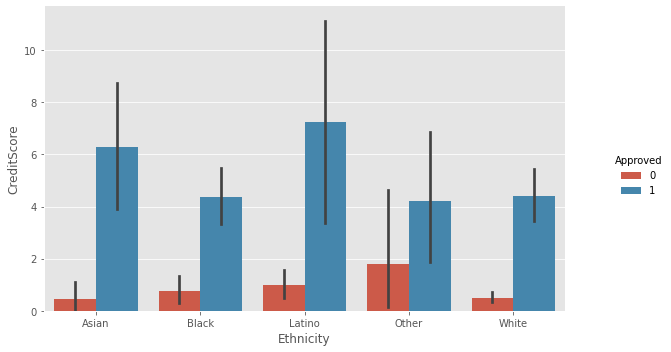

In [43]:
g = sns.catplot(data=df, x="Ethnicity", y="CreditScore",hue="Approved", kind="bar")
g.fig.set_size_inches(10, 5)

 Those who got approved, had a higher credit score and we that across the ethnicities. Definitely you see latinos with approvals definitely had a higher credit score.

## Dimesionality Reduction

* If there are too many variables/columns in a dataset.
* Assume Information to be extracted as a signal.
* The rest of the data is garbage or noise.

Dimensionality Reduction reduces Noise in a dataset.

* Data Compression
* Allows the data to take up less storage space as well as reduces computation times.
* Better data visualization
* Sometimes better models to learn patterns in data are built

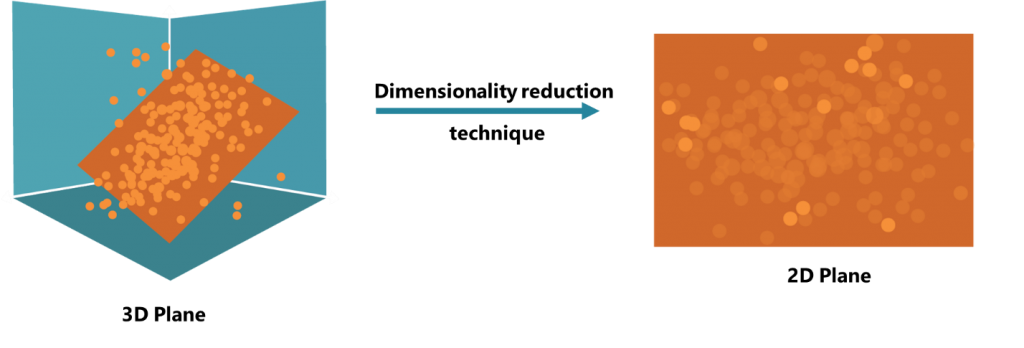

## Principal Component Analysis
* Dimensionality Reduction technique
* Extract maximum information or variance from the data.
* https://builtin.com/data-science/step-step-explanation-principal-component-analysis
* https://www.youtube.com/watch?v=FgakZw6K1QQ

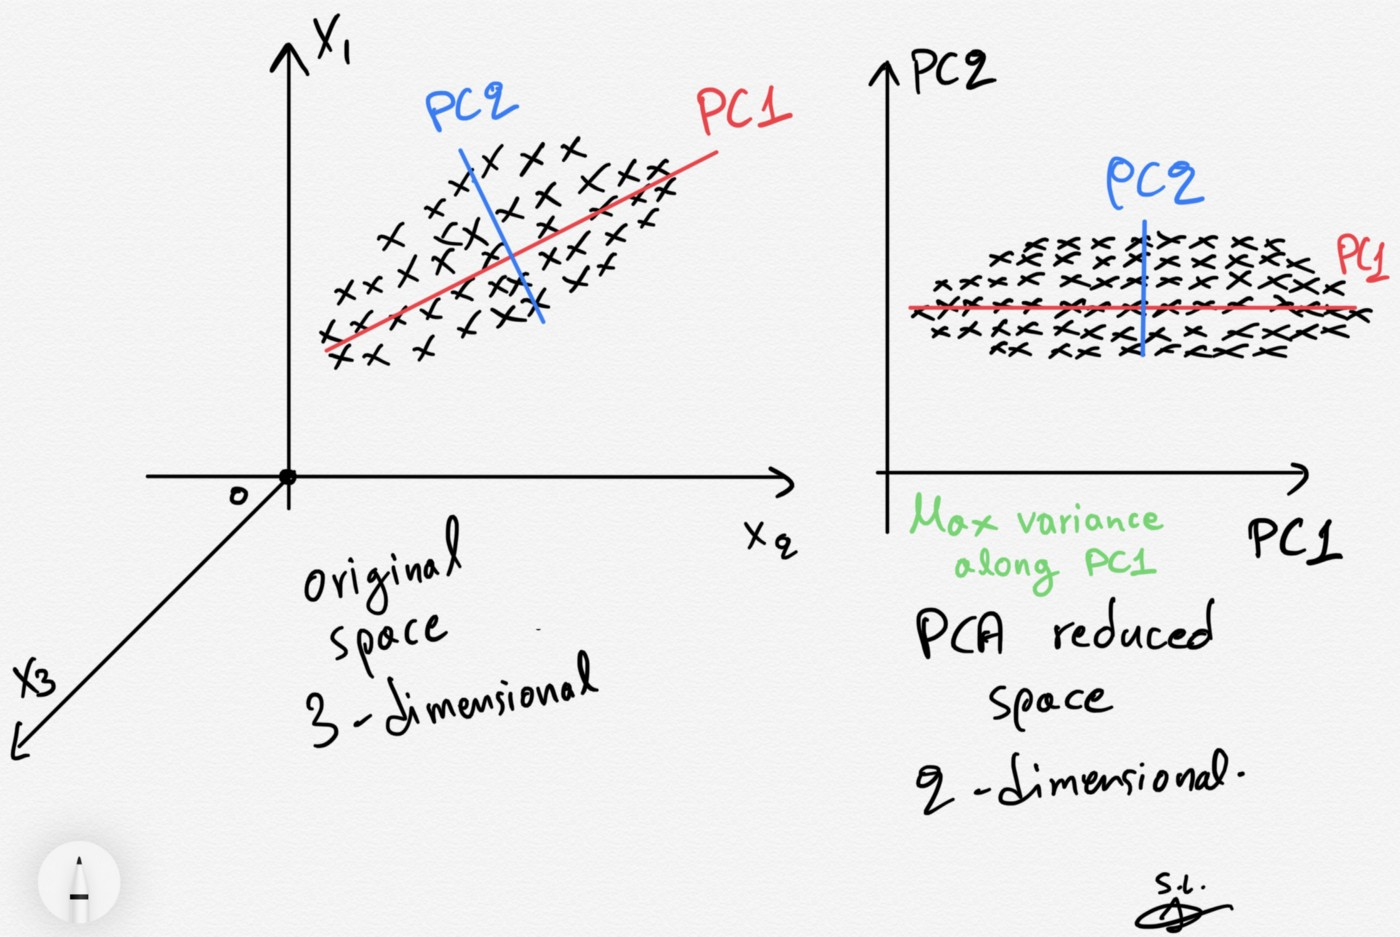

In [14]:
numerical_variables = df[numerical]

numerical_variables.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'], dtype='object')

In [15]:
numerical_variables.apply([np.mean,np.std])

,Age,Debt,YearsEmployed,CreditScore,Income
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598


## Important steps:
* Center data using means(individual variable means subtracted from each variable)
* Standardize data using standard deviation after centering(Divide each variable by std deviation of each variable)

In [16]:
std_numerical_variables = numerical_variables.apply(lambda x:(x-x.mean())/x.std())

std_numerical_variables.apply([np.mean,np.std])

,Age,Debt,YearsEmployed,CreditScore,Income
mean,2.059544e-16,1.029772e-17,1.029772e-16,1.029772e-17,1.029772e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


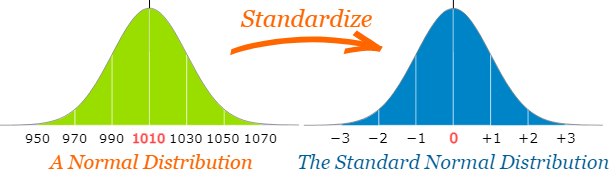


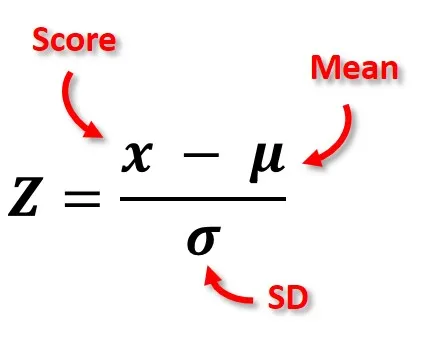


Now they have the similar mean of almost 0 and a standard deviation of 1, now these variables, following a normal distribution, after normalization or Z score transformation, follow a standard normal distribution or Z distribution.

Reading: https://www.scribbr.com/statistics/standard-normal-distribution/#:~:text=While%20data%20points%20are%20referred,is%20greater%20than%20the%20mean.

In [17]:
## Number of components could be an integer, or amount information saved

pca = PCA(n_components=3,random_state=1)
pca_vectors = pca.fit_transform(std_numerical_variables)

##### Explained Variance Ratio per component

In [18]:
pca.explained_variance_ratio_

array([0.37273032, 0.20287181, 0.16567569])

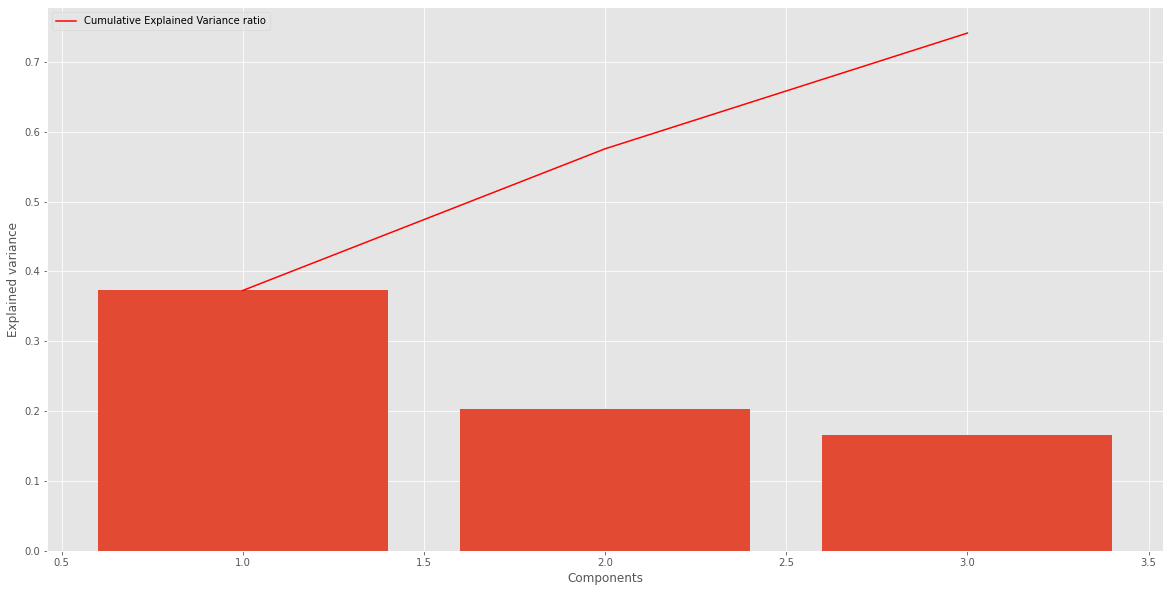

In [19]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

Shows the first component has 37% of the information, second component has 20% and finally the third component has 16.6% of the information. Total they cover 75% of the information from the five variables we had.

#### Effect of variables on each component

You can this chart showing what constitues the first component vs 2nd vs 3rd?

Like this shows:

First principal component  = 0.47xAge + 0.47xDebt + 0.56xYearsEmployed + 0.47xCreditScore + 0.15xIncome

Second principal component = -0.31xAge + 0.21xDebt - 0.18xYearsEmployed + 0.026xCreditScore + 0.91xIncome

Third principal component = -0.63xAge + 0.33xDebt - 0.17xYearsEmployed + 0.59xCreditScore - 0.34xIncome

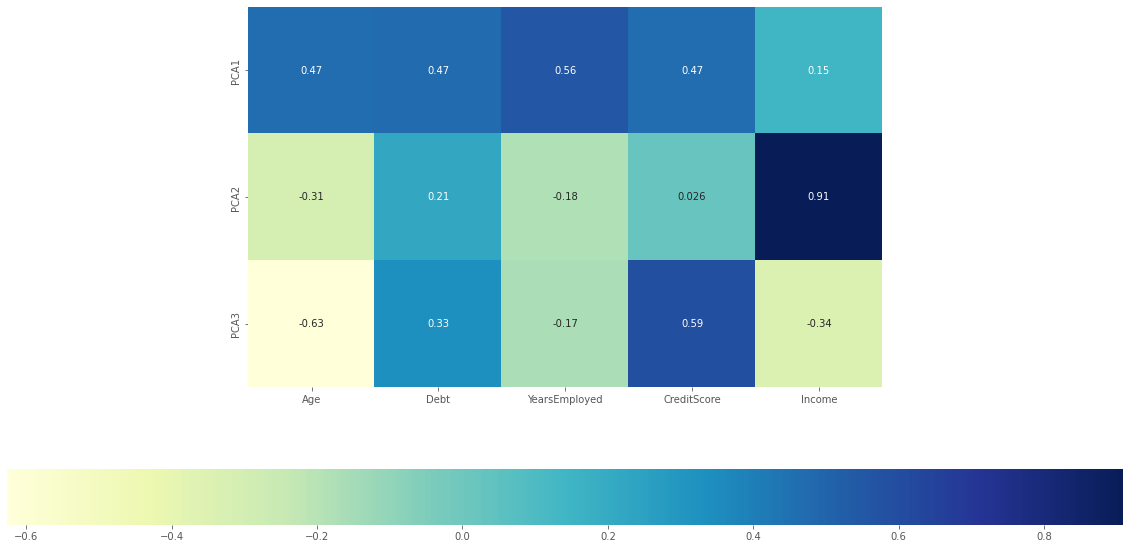

In [20]:
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(std_numerical_variables.columns),
                 cbar_kws={"orientation": "horizontal"},annot=True,fmt='1.2g')
ax.set_aspect("equal")

#### PCA Biplot

https://www.uv.es/visualstats/vista-frames/help/lecturenotes/lecture13/biplot.html#:~:text=A%20biplot%20uses%20points%20to,and%20the%20vectors%20represents%20judges.

Biplot is an interesting plot and contains lot of useful information.

It contains two plots:

* PCA scatter plot which shows first two component ( We already plotted this above)
* PCA loading plot which shows how strongly each characteristic influences a principal component.


PCA Loading Plot: All vectors start at origin and their projected values on components explains how much weight they have on that component. Also , angles between individual vectors tells about correlation between them.

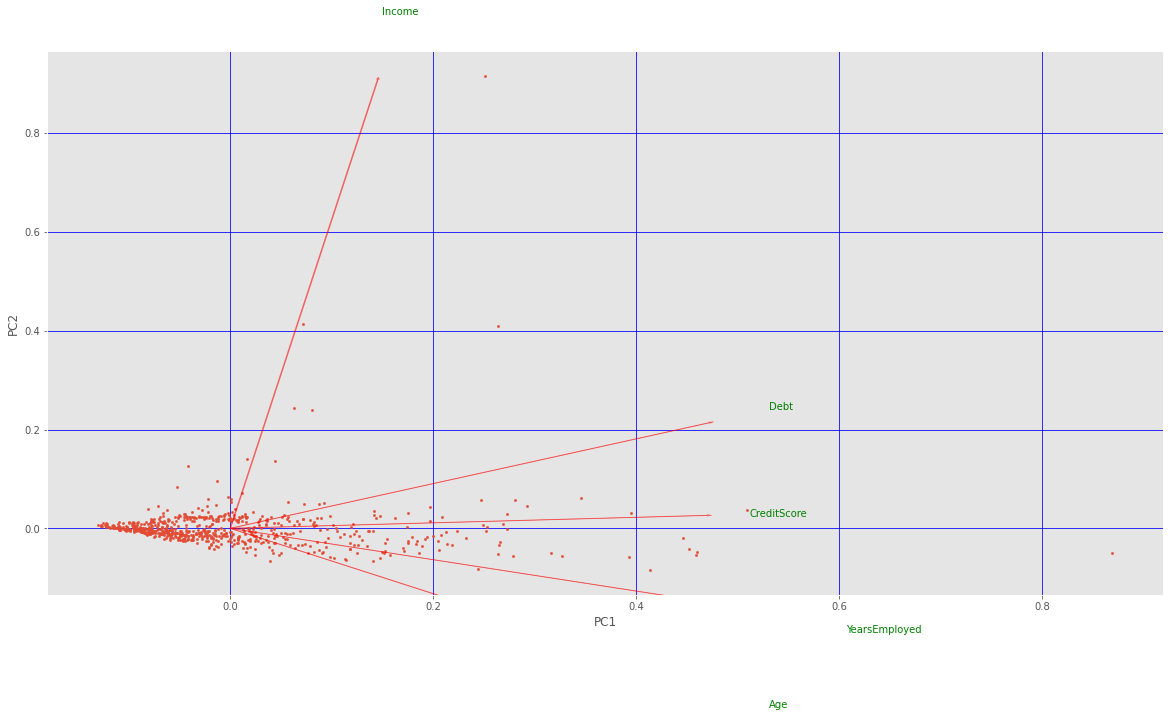

In [21]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(b=True, which='major', color='b', linestyle='-')

myplot(pca_vectors[:,0:2],np.transpose(pca.components_[0:2, :]),list(std_numerical_variables.columns))
plt.show()

The closer the line to a component axis, the more it is correlated to that component. Like income is more correlated with Second Component while Debt, CreditScore, YearsEmployed and Age are more correlated to the First Component.

## Cluster Analysis
Homogenous within groups, heterogeneous outside.

Find groups and separate them out as much as possible.

* Find groups of similar features.
* Segmentation
* Similar Products or People - Target them.

Further reading:
* https://www.jigsawacademy.com/cluster-analysis-for-business/#:~:text=Cluster%20analysis%20is%20an%20exploratory,same%20group%20and%20minimal%20otherwise.
* https://www.mjvinnovation.com/blog/types-of-clustering/

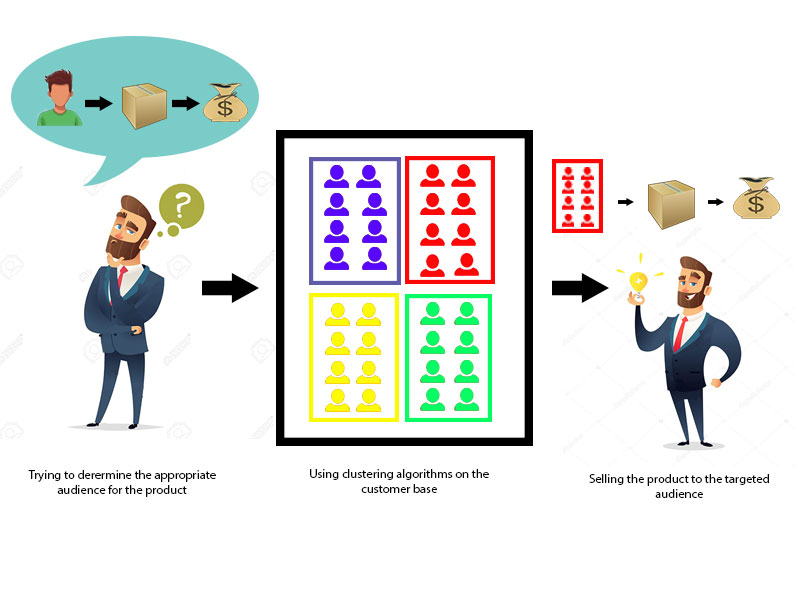

### KMeans Clustering 


* K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. 
* Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.
* It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

Further reading:
* https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/
* https://www.learnbymarketing.com/methods/k-means-clustering/

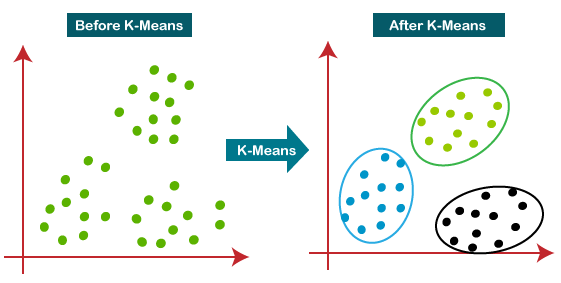

The k-means clustering algorithm mainly performs two tasks:

* Determines the best value for K center points or centroids by an iterative process.
* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

## Important step: Center and Standardize the data

In [22]:
std_numerical_variables

,Age,Debt,YearsEmployed,CreditScore,Income
0,-0.057681,-0.955920,-0.290872,-0.287892,-0.195272
1,2.289656,-0.060007,0.244013,0.740293,-0.087788
2,-0.591397,-0.855481,-0.216167,-0.493529,-0.037117
3,-0.310627,-0.646569,0.456175,0.534656,-0.194696
4,-0.956482,0.174015,-0.153415,-0.493529,-0.195272
...,...,...,...,...,...
685,-0.879756,1.069928,-0.290872,-0.493529,-0.195272
686,-0.745694,-0.805262,-0.066758,-0.082255,-0.119649
687,-0.528161,1.755924,-0.066758,-0.287892,-0.195080
688,-1.146192,-0.914740,-0.652442,-0.493529,-0.051321


Apply Kmeans for as many clusters as you want.

You need more closeness or similarity between data points in a group and dissimilarity between data points in one group and data points in another group.

So larger the inertia - more the instability or we see the algorithm isn't making strong groups at all. We see here that more clusters we form, lesser the inertia.

Strike a balance between number of clusters and inertia. You don't want too many or too less clusters, simultaneaously look for inertia drops.

In [23]:
kmeans = KMeans(n_clusters=3,max_iter=10000,random_state=1)

kmeans.fit(std_numerical_variables)

kmeans.inertia_

2286.4866765071793

In [24]:
kmeans = KMeans(n_clusters=4,max_iter=10000,random_state=1)

kmeans.fit(std_numerical_variables)

kmeans.inertia_

1898.4386552433252

In [25]:
kmeans = KMeans(n_clusters=5,max_iter=10000,random_state=1)

kmeans.fit(std_numerical_variables)

kmeans.inertia_

1588.4609748520588

In [26]:
kmeans = KMeans(n_clusters=30,max_iter=10000,random_state=1)

kmeans.fit(std_numerical_variables)

kmeans.inertia_

378.8872478253637

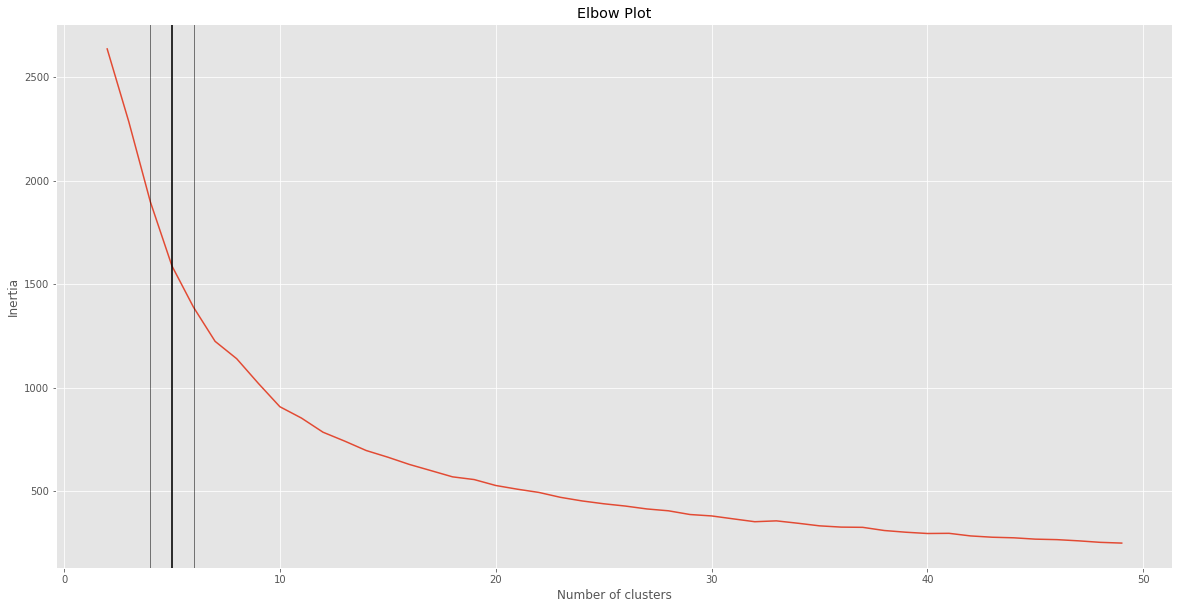

In [27]:
def find_optimal_clusters(df,clusters=50):
  df2 = numerical_variables.apply(lambda x:(x - x.mean())/x.std())
  sses = []

  for cl in range(2,clusters):
    kmeans = KMeans(n_clusters=cl,random_state=1,max_iter=10000)
    kmeans.fit(df2)
    sses.append(kmeans.inertia_)

  ax = sns.lineplot(x= range(2,clusters),y=sses)
  ax.axvline(5,color ='black', lw = 2, alpha = 0.8)
  ax.axvline(6,color='black',lw=1,alpha=0.5)
  ax.axvline(4,color='black',lw=1,alpha=0.5)
  ax.set(xlabel='Number of clusters', ylabel='Inertia',title='Elbow Plot')

  return None



find_optimal_clusters(numerical_variables,clusters=50)

Here we see the optimal number of clusters is 5 - this is the elbow and we compare the **amount** of drop in inertia from one value of number of clusters to another  value of number of clusters.

In [28]:

kmeans = KMeans(n_clusters=5,max_iter=10000,random_state=1)

kmeans.fit(std_numerical_variables)

KMeans(max_iter=10000, n_clusters=5, random_state=1)

In [29]:
numerical_variables['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_
std_numerical_variables['clusters'] = kmeans.labels_

## Cluster profiling

Finding out who belongs to what cluster.

In [44]:
numerical_variables.groupby('clusters').agg([np.size,np.mean])

Age            Debt            YearsEmployed           CreditScore  \
         size       mean size       mean          size      mean        size   
clusters                                                                       
0          45  47.227333   45  11.953556            45  8.831556          45   
1         376  27.019255  376   1.772035           376  1.001875         376   
2         132  24.101212  132  11.090379           132  1.507008         132   
3           4  33.065000    4   8.145000             4  3.635000           4   
4         133  46.215414  133   4.382068           133  4.109474         133   

                    Income                
               mean   size          mean  
clusters                                  
0         13.622222     45   2127.000000  
1          1.292553    376    498.760638  
2          2.151515    132    857.583333  
3          1.750000      4  58096.250000  
4          2.000000    133    550.082707

Cluster 0 - Average Income, Top credit score, most years of being employed, most debt, middle aged.

Cluster 1 - Many people with Lowest income of the lot, lowest credit score, least years employed, lowest debt, but average age of 27.

Cluster 2 -  Low income, low credit score, less years employed, high debt years and on youngsters.

Cluster 3 - Highest income, low credit score, 4 years of employment on an average, 8 years of debt on an average and 33 years of age on an average.


Cluster 4 - Low income, low credit score, 4 years of employment on an average, 4 years of debt on an average, and almost middle aged.


In [31]:
pd.crosstab(df['clusters'],df['Approved'])

Approved,0,1
clusters,,
0,2,43
1,257,119
2,66,66
3,0,4
4,58,75


Pivot tables based on Income and Credit Score given other attributes

In [32]:
pd.pivot_table(df,index=['Approved','Gender','Ethnicity'],columns='clusters',values='Income',aggfunc=np.mean,fill_value=0)

clusters                             0            1            2       3  \
Approved Gender Ethnicity                                                  
0        0      Asian         0.000000   152.000000     0.000000       0   
                Black         0.000000   124.571429     9.500000       0   
                Latino        0.000000    61.647059  1750.333333       0   
                Other         0.000000    14.800000     0.000000       0   
                White         0.000000    89.285714   301.333333       0   
         1      Asian         0.000000   689.200000     1.400000       0   
                Black         5.000000    83.000000    17.285714       0   
                Latino        0.000000   474.692308     0.200000       0   
                Other       130.000000   472.250000  1110.000000       0   
                White         0.000000   138.091603   598.185185       0   
1        0      Asian      3350.000000     0.000000  3065.000000   51100   
                Black      2656.500000   820.416667  1085.600000       0   
                Latino      823.500000     0.000000     0.000000       0   
                Other      3376.000000   500.000000  6606.000000       0   
                White      4340.750000  1121.000000  2001.222222       0   
         1      Asian      5302.500000   338.500000   444.000000       0   
                Black       841.000000  2467.000000   488.250000   31285   
                Latino      650.000000     0.000000     0.000000       0   
                Other       360.750000    20.000000     0.000000  100000   
                White      2098.916667  1103.100000   775.280000   50000   

clusters                             4  
Approved Gender Ethnicity               
0        0      Asian      1098.500000  
                Black        16.666667  
                Latino        8.200000  
                Other        73.500000  
                White        27.000000  
         1      Asian        98.888889  
                Black        14.285714  
                Latino       60.833333  
                Other        12.000000  
                White        74.000000  
1        0      Asian       300.000000  
                Black       459.000000  
                Latino      100.000000  
                Other       960.000000  
                White       935.166667  
         1      Asian       654.500000  
                Black       514.142857  
                Latino     4425.500000  
                Other         0.000000  
                White      1223.086957

In [33]:
pd.pivot_table(df,index=['Approved','Industry'],columns='clusters',values='Income',aggfunc=np.mean,fill_value=0)

clusters                                   0            1            2  \
Approved Industry                                                        
0        CommunicationServices      0.000000   133.562500  1333.666667   
         ConsumerDiscretionary      0.000000   381.896552   194.666667   
         ConsumerStaples            0.000000   157.818182   151.250000   
         Education                130.000000   264.400000   277.500000   
         Energy                     0.000000   123.660714   468.923077   
         Financials                 0.000000   182.615385   179.285714   
         Healthcare                 0.000000   267.370370   656.500000   
         Industrials                0.000000   169.960000   888.500000   
         InformationTechnology      0.000000    66.300000     2.000000   
         Materials                  5.000000   101.411765   177.714286   
         Real Estate                0.000000    36.000000   347.500000   
         Research                   0.000000    43.000000     0.000000   
         Transport                  0.000000     2.000000     0.000000   
         Utilities                  0.000000     7.000000    32.000000   
1        CommunicationServices   1484.750000  2984.833333     0.000000   
         ConsumerDiscretionary   3900.000000   100.000000   742.000000   
         ConsumerStaples            0.000000   628.600000  1218.400000   
         Education               1171.250000   166.666667  6606.000000   
         Energy                  2890.181818  1360.542857   691.200000   
         Financials             11202.000000   100.000000   234.000000   
         Healthcare               900.000000     0.000000     0.000000   
         Industrials              711.333333   736.437500   792.888889   
         InformationTechnology    129.000000  1866.000000   509.500000   
         Materials               3398.428571   604.941176  2900.384615   
         Real Estate                0.000000    82.000000   365.000000   
         Research                 247.000000     0.000000     0.000000   
         Transport                134.000000     0.000000     0.000000   
         Utilities                500.000000  2186.769231   452.272727   

clusters                             3            4  
Approved Industry                                    
0        CommunicationServices       0    37.333333  
         ConsumerDiscretionary       0   320.700000  
         ConsumerStaples             0    43.400000  
         Education                   0    12.000000  
         Energy                      0    60.909091  
         Financials                  0    17.000000  
         Healthcare                  0    36.909091  
         Industrials                 0    75.000000  
         InformationTechnology       0     0.000000  
         Materials                   0    25.000000  
         Real Estate                 0    87.500000  
         Research                    0    27.000000  
         Transport                   0     0.000000  
         Utilities                   0     0.000000  
1        CommunicationServices       0   603.666667  
         ConsumerDiscretionary       0   308.428571  
         ConsumerStaples             0   149.750000  
         Education               51100  1000.000000  
         Energy                      0  1399.700000  
         Financials                  0  1290.571429  
         Healthcare             100000  2983.666667  
         Industrials                 0  2300.000000  
         InformationTechnology   50000   335.125000  
         Materials                   0   230.571429  
         Real Estate                 0     0.000000  
         Research                    0   960.000000  
         Transport               31285     0.000000  
         Utilities                   0  1193.500000

In [34]:
pd.pivot_table(df,index=['Approved','Gender','Ethnicity'],columns='clusters',values='CreditScore',aggfunc=np.mean,fill_value=0)

clusters                        0         1         2  3         4
Approved Gender Ethnicity                                         
0        0      Asian       0.000  1.000000  0.000000  0  0.000000
                Black       0.000  0.571429  2.000000  0  1.000000
                Latino      0.000  1.470588  0.333333  0  0.200000
                Other       0.000  0.200000  0.000000  0  0.000000
                White       0.000  0.619048  1.833333  0  0.400000
         1      Asian       0.000  0.666667  0.400000  0  0.000000
                Black       7.000  0.500000  0.285714  0  0.000000
                Latino      0.000  1.153846  0.600000  0  0.500000
                Other      20.000  1.000000  0.000000  0  0.000000
                White       0.000  0.419847  0.259259  0  0.222222
1        0      Asian      11.000  4.000000  7.000000  6  0.000000
                Black      16.000  2.750000  3.800000  0  3.600000
                Latino     13.000  0.000000  0.000000  0  1.000000
                Other      14.000  5.000000  5.500000  0  0.000000
                White       8.750  3.111111  3.666667  0  3.000000
         1      Asian      17.000  1.500000  2.000000  0  4.875000
                Black      10.875  2.833333  3.250000  0  3.047619
                Latino     13.000  0.000000  0.000000  0  2.500000
                Other       7.000  0.000000  0.000000  0  1.000000
                White      18.000  2.916667  3.400000  1  3.869565

You can use color as the cluster numbers and you can see separations and not so many separations here. Cluster 4  and cluster 0,1 and 2 are all well seperated in some of these scatterplots.

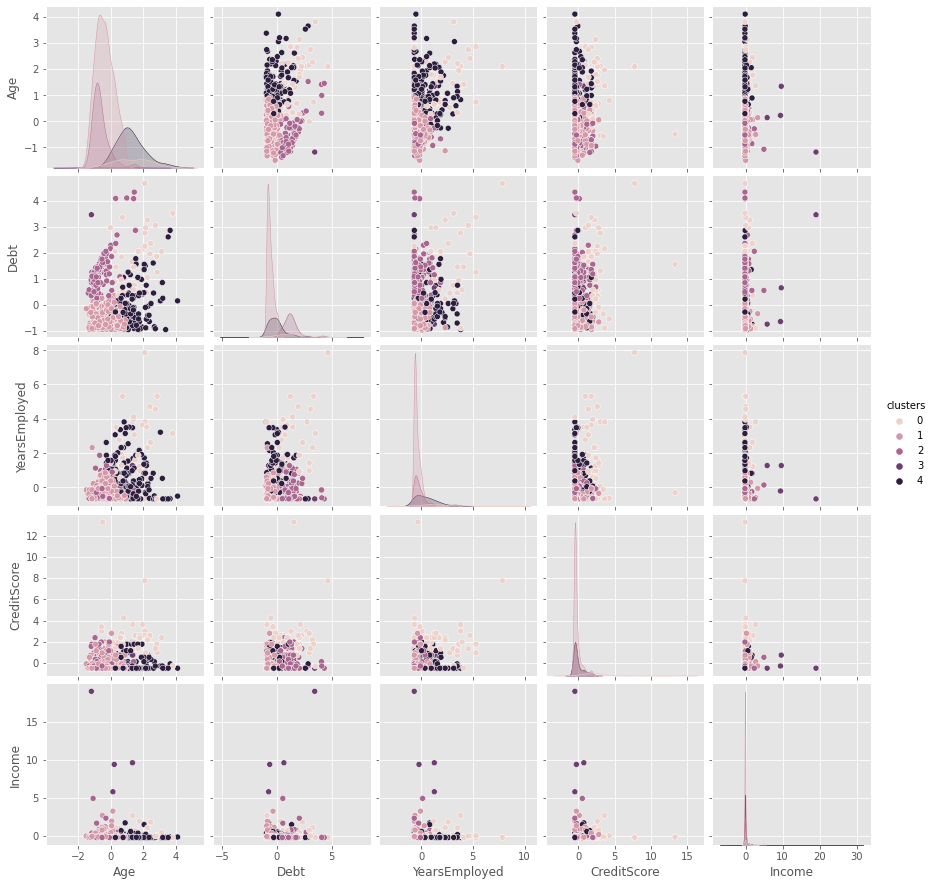

In [35]:
sns.pairplot(data=std_numerical_variables,hue='clusters')

### Combine PCA with clustering for better data visualization

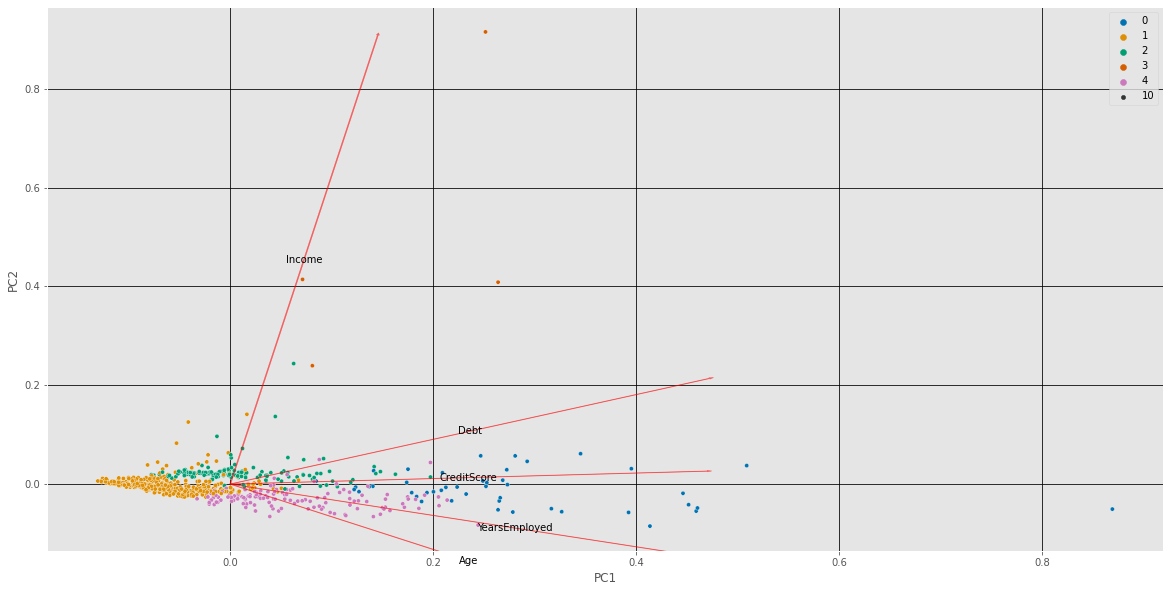

In [36]:
def myplot(score,coeff,clusters,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(xs * scalex,ys * scaley,s=5,hue=clusters,palette='colorblind',size=10)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*0.5, coeff[i,1] * 0.5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 0.5, coeff[i,1] * 0.5, labels[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(b=True, which='major', color='black', linestyle='-')

myplot(pca_vectors[:,0:2],np.transpose(pca.components_[0:2, :]), std_numerical_variables['clusters'].values,list(std_numerical_variables.columns))
plt.show()

With two components and 5 clusters, we can clearly see the clusters now. Cluster 0 is on the far right with low 2nd component values and high first component values, they are more related to credit scores and debts. The 4th cluster - pink cluster shows more relation to Age and Years Employed. While cluster 2 -  Green is more related to negative values of 1st component and slight positive values of the 2nd component, more related to income, same for red but with high values on 2nd component and 1st component. Finally the cluster 1 - yellow has negative values in 1st component and small values in 2nd component. 

Reiterating:


Cluster 0 - Average Income, Top credit score, most years of being employed, most debt, middle aged.

Cluster 1 - Many people with Lowest income of the lot, lowest credit score, least years employed, lowest debt, but average age of 27.

Cluster 2 -  Low income, low credit score, less years employed, high debt years and on youngsters.

Cluster 3 - Highest income, low credit score, 4 years of employment on an average, 8 years of debt on an average and 33 years of age on an average.


Cluster 4 - Low income, low credit score, 4 years of employment on an average, 4 years of debt on an average, and almost middle aged.